In [28]:
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

# 
from sklearn.feature_selection import VarianceThreshold

#model metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# RFE 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#Hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Association Rules

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn
def generate_accuracy_and_heatmap(model, x, y):
    train_predictions = model.predict(x)
    acc = accuracy_score(y, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    class_rep = classification_report(y, train_predictions )
    print("Classification Report:\n {}".format(class_rep))

    cross_val = cross_val_score(model, x, y)
    print("Cross Validation: {}".format(cross_val))

    #score
    score = model.score(x,y)
    print("Score: {}".format(score))

    #Predictions
    train_predictions_proba = model.predict_proba(x)
    ll = log_loss(y_test, train_predictions_proba)
    print("Log Loss: {}".format(ll))

    print ("\n")
    print (pd.crosstab(pd.Series(train_predictions, name='Predicted'),
                       pd.Series(y,name='BHStaging')))
    return 1

In [3]:
####################################################################################################
##                             1. Import and Prepare the Data                                     ##
####################################################################################################

hcv= pd.read_csv('HCV-Egy-Data/HCV-Egy-Data.csv')

hcv.columns = hcv.columns.str.replace(' ', '')


# Data and Text Cleaning

hcv.rename(columns={"Nausea/Vomting": "NauseaVomting"}, inplace=True)
hcv.rename(columns={"Fatigue&generalizedboneache": "FatigueBoneAche"}, inplace=True)
hcv.rename(columns={"Epigastricpain": "EpigastricPain"}, inplace=True)
hcv.rename(columns={"BaselinehistologicalGrading": "BHSGrading"}, inplace=True)
hcv.rename(columns={"Baselinehistologicalstaging": "BHStaging"}, inplace=True)

hcv['Gender'] = hcv['Gender'].astype('category')
hcv['Fever'] = hcv['Fever'].astype('category')
hcv['NauseaVomting'] = hcv['NauseaVomting'].astype('category')
hcv['Headache'] = hcv['Headache'].astype('category')
hcv['Diarrhea'] = hcv['Diarrhea'].astype('category')
hcv['FatigueBoneAche'] = hcv['FatigueBoneAche'].astype('category')
hcv['Jaundice'] = hcv['Jaundice'].astype('category')
hcv['EpigastricPain'] = hcv['EpigastricPain'].astype('category')
hcv['BHStaging'] = hcv['BHStaging'].astype('category')
hcv['BHSGrading'] = hcv['BHSGrading'].astype('category')

hcv.describe()

,Age,BMI,WBC,RBC,HGB,Plat,AST1,ALT1,ALT4,ALT12,ALT24,ALT36,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF
count,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000
mean,46.319134,28.608664,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975
std,8.781506,4.076215,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713
min,32.000000,22.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000
25%,39.000000,25.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000
50%,46.000000,29.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000
75%,54.000000,32.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000
max,61.000000,35.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000


In [4]:
hcv_raw = hcv.copy() 

hcv_raw['Gender'] = hcv_raw.Gender.astype('category') 
hcv_raw['Fever'] = hcv_raw.Fever.astype('category')
hcv_raw['NauseaVomting'] = hcv_raw.NauseaVomting.astype('category')
hcv_raw['Headache'] = hcv_raw.Headache.astype('category')
hcv_raw['Diarrhea'] = hcv_raw.Diarrhea.astype('category')
hcv_raw['FatigueBoneAche'] = hcv_raw.FatigueBoneAche.astype('category')
hcv_raw['Jaundice'] = hcv_raw.Jaundice.astype('category')
hcv_raw['EpigastricPain'] = hcv_raw.EpigastricPain.astype('category')
hcv_raw['BHStaging'] = hcv_raw.BHStaging.astype('category')
hcv_raw['HGB'] = hcv_raw.HGB.astype('category')
hcv_raw['BHSGrading'] = hcv_raw['BHSGrading'].astype('category')


In [5]:
#Dependent Variable Training Set (y Training)
#'No default', 'Default'
depVar = hcv_raw['BHStaging']

#features x
X = hcv_raw.iloc[:,0:28]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1385 non-null   int64   
 1   Gender           1385 non-null   category
 2   BMI              1385 non-null   int64   
 3   Fever            1385 non-null   category
 4   NauseaVomting    1385 non-null   category
 5   Headache         1385 non-null   category
 6   Diarrhea         1385 non-null   category
 7   FatigueBoneAche  1385 non-null   category
 8   Jaundice         1385 non-null   category
 9   EpigastricPain   1385 non-null   category
 10  WBC              1385 non-null   int64   
 11  RBC              1385 non-null   float64 
 12  HGB              1385 non-null   category
 13  Plat             1385 non-null   float64 
 14  AST1             1385 non-null   int64   
 15  ALT1             1385 non-null   int64   
 16  ALT4             1385 non-null   float64 


In [6]:
#################### RFE - Run to get importance and use only the one with higher importance
target = 'BHStaging'
X = hcv_raw.loc[:,   hcv.columns != target]
Y = hcv_raw.loc[:, hcv.columns == target]
clf = RandomForestClassifier(max_depth=10, n_estimators=50, max_features=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [7]:
rfecv = RFECV(estimator=clf, step=3, cv=10, scoring='accuracy')
rfecv = rfecv.fit(x_train, np.ravel(y_train))


In [8]:
print('Optimal number of features: ',rfecv.n_features_)
print('Best features: ', x_train.columns[rfecv.support_])


Optimal number of features:  25
Best features:  Index(['Age', 'Gender', 'BMI', 'NauseaVomting', 'Diarrhea', 'Jaundice',
       'EpigastricPain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4',
       'ALT12', 'ALT24', 'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4',
       'RNA12', 'RNAEOT', 'RNAEF', 'BHSGrading'],
      dtype='object')


In [9]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

print(x_train_rfecv)

[[51 2 23 ... 229824 438732 14]
 [61 2 24 ... 346081 693440 6]
 [35 2 23 ... 404314 477719 16]
 ...
 [33 2 31 ... 5 5 5]
 [32 1 34 ... 431643 574003 12]
 [59 2 35 ... 185799 363462 14]]


In [10]:
rfecv_model = clf.fit(x_train_rfecv, np.ravel(y_train))
generate_accuracy_and_heatmap(rfecv_model, x_test_rfecv, np.ravel(y_test))

Accuracy: 28.5303%
Classification Report:
               precision    recall  f1-score   support

           1       0.21      0.25      0.23        77
           2       0.25      0.21      0.23        84
           3       0.36      0.28      0.31        94
           4       0.32      0.39      0.35        92

    accuracy                           0.29       347
   macro avg       0.29      0.28      0.28       347
weighted avg       0.29      0.29      0.28       347

Cross Validation: [0.25714286 0.22857143 0.30434783 0.26086957 0.26086957]
Score: 0.28530259365994237
Log Loss: 1.4102955923792473


DEFAULT     1   2   3   4
Predicted                
1          19  29  25  18
2          17  18  15  22
3          15  15  26  16
4          26  22  28  36


1

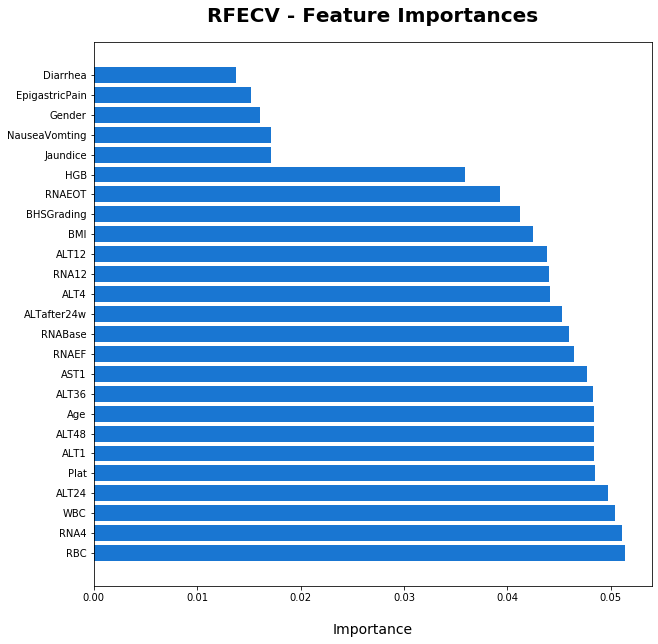

In [12]:
dset = pd.DataFrame()
dset['attr'] = x_train.columns[np.where(rfecv.support_ == True)[0]]
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)
dset

plt.figure(figsize=(10, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [13]:
################ Discretize as per requested guidelines

hcv_dis = hcv.copy() 

# age [0; 32], ]32; 37], ]37; 42],]42; 47], ]47; 52], ]52; 57],]57; 62]
hcv_dis['Age'] = pd.cut(hcv_dis['Age'], bins = [0, 32, 37, 42, 47, 52, 57, 62], labels = False )

#BMI(Body Mass Index)	22:35	[0; 18:5[ [18:5; 25[, [25; 30[, [30; 35[, [35; 40[
hcv_dis['BMI'] = pd.cut(hcv_dis['BMI'], bins = [0, 18, 25, 30, 35, 40], labels = False  )

hcv_dis['Gender'] = hcv_dis['Gender'].replace([1,2],['Male', 'Female'] )
hcv_dis['Fever'] =hcv_dis['Fever'].replace([1,2],['Absent', 'Present'] )
hcv_dis['NauseaVomting'] = hcv_dis['NauseaVomting'].replace([1,2],['Absent', 'Present'] )
hcv_dis['Headache'] = hcv_dis['Headache'].replace([1,2],['Absent', 'Present'] )
hcv_dis['Diarrhea'] = hcv_dis['Diarrhea'].replace([1,2],['Absent', 'Present'] )
hcv_dis['FatigueBoneAche'] = hcv_dis['FatigueBoneAche'].replace([1,2],['Absent', 'Present'] )
hcv_dis['Jaundice'] = hcv_dis['Jaundice'].replace([1,2],['Absent', 'Present'])
hcv_dis['EpigastricPain'] = hcv_dis['EpigastricPain'].replace([1,2],['Absent', 'Present'] )

#HGB	 If (Gender==[Male]):[2; 14[, [14; 17:5], ]17:5; 20]
#If(Gender==[Female]):[2; 12:3[, [12:3; 15:3], ]15:3; 20]

def apply_HGB_bin_string(gender, value):
    cat = ""
    mean = 0
    if gender == 1:
        if value > 2 and value <= 14:
            cat = '(2, 14]'
            mean = 9
        elif value > 14 and value <= 17.5:
            cat = '(14, 17.5]'
            mean = 15.75
        elif value > 17.5 and value <= 20 :
            cat = '(17, 20]'
            mean = 27
    elif gender == 2:
        if value > 2 and value <= 12.3 :
            cat = '(2, 12.3]'
            mean = 7.15
        elif value > 12.3 and value <= 15.3 :
            cat = '(12.3, 15.3]'
            mean = 13.8
        elif value > 15.3 and value <= 20 :
            cat = '(15.3, 20]'
            mean = 17.5
    return mean

hcv_dis['HGB'] = hcv_dis.apply(lambda x: apply_HGB_bin_string(x.Gender, x.HGB), axis=1)
  
 

#WBC [0; 4000[, [4000; 11000[, [11000; 12101]
hcv_dis['WBC'] = pd.cut(hcv_dis['WBC'], bins = [0, 4000, 11000, 12101], labels = False )


#RBC [0; 3000000[, [3000000; 5000000[,[5000000; 5018451]
hcv_dis['RBC'] = pd.cut(hcv_dis['RBC'], bins = [0, 3000000, 5000000, 5018451], labels = False  )

    
        
# Plat(Platelet) [93013; 100000[, [100000; 255000[,[255000; 226465[
hcv_dis['Plat'] = pd.cut(hcv_dis['Plat'], bins = [93013, 100000,  226464, 255000], labels = False  )

#AST1	ALT1	ALT4	ALT12	ALT24	ALT36	ALT48	ALTafter24w	
hcv_dis['AST1'] = pd.cut(hcv_dis['AST1'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT1'] = pd.cut(hcv_dis['ALT1'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT4'] = pd.cut(hcv_dis['ALT4'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT12'] = pd.cut(hcv_dis['ALT12'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT24'] = pd.cut(hcv_dis['ALT24'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT36'] = pd.cut(hcv_dis['ALT36'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT48'] = pd.cut(hcv_dis['ALT48'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALTafter24w'] = pd.cut(hcv_dis['ALTafter24w'], bins=[0, 20, 40, 128] , labels = False )

#RNABase  [0; 5], ]5; 1201086]
hcv_dis['RNABase'] = pd.cut(hcv_dis['RNABase'], bins=[0, 5, 1201086] , labels = False )

#RNA4	[0; 5], ]5; 1201715]
hcv_dis['RNA4'] = pd.cut(hcv_dis['RNA4'], bins=[0, 5, 1201715], labels = False  )



#RNA12	[0; 5], ]5; 3731527]
hcv_dis['RNA12'] = pd.cut(hcv_dis['RNA12'], bins=[0, 5, 3731527], labels = False  )


#RNAEOT	 [0; 5], ]5; 808450]
hcv_dis['RNAEOT'] = pd.cut(hcv_dis['RNAEOT'], bins=[0, 5, 808450], labels = False  )


#RNAEF	[0; 5], ]5; 808450]
hcv_dis['RNAEF'] = pd.cut(hcv_dis['RNAEF'], bins=[0, 5, 808450], labels = False  )


#BHSGrading [1]; [2]; [3]; :::[16]

# [No Fibrosis], [Portal Fibrosis],Staging (Class Label) [Few Septa], [Many Septa], [Cirrhosis]
hcv_dis['BHStaging'] = hcv_dis['BHStaging'].replace([0,1,2,3,4],['No Fibrosis', 'Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis' ])

hcv_dis['Age'] = hcv_dis['Age'].astype('category') 
hcv_dis['BMI'] = hcv_dis['BMI'].astype('category')

hcv_dis['Gender'] = hcv_dis.Gender.astype('category') 
hcv_dis['Fever'] = hcv_dis.Fever.astype('category')
hcv_dis['NauseaVomting'] = hcv_dis.NauseaVomting.astype('category')
hcv_dis['Headache'] = hcv_dis.Headache.astype('category')
hcv_dis['Diarrhea'] = hcv_dis.Diarrhea.astype('category')
hcv_dis['FatigueBoneAche'] = hcv_dis.FatigueBoneAche.astype('category')
hcv_dis['Jaundice'] = hcv_dis.Jaundice.astype('category')
hcv_dis['EpigastricPain'] = hcv_dis.EpigastricPain.astype('category')
hcv_dis['BHStaging'] = hcv_dis.BHStaging.astype('category')
hcv_dis['HGB'] = hcv_dis.HGB.astype('category')

hcv_dis['WBC'] = hcv_dis.WBC.astype('category')
hcv_dis['RBC'] = hcv_dis.RBC.astype('category')
hcv_dis['Plat'] = hcv_dis.Plat.astype('category')
hcv_dis['AST1'] = hcv_dis.AST1.astype('category')
hcv_dis['ALT1'] = hcv_dis.ALT1.astype('category')
hcv_dis['ALT4'] = hcv_dis.ALT4.astype('category')

hcv_dis['ALT12'] = hcv_dis.ALT12.astype('category')
hcv_dis['ALT24'] = hcv_dis.ALT24.astype('category')
hcv_dis['ALT36'] = hcv_dis.ALT36.astype('category')
hcv_dis['ALT48'] = hcv_dis.ALT48.astype('category')
hcv_dis['ALTafter24w'] = hcv_dis.ALTafter24w.astype('category')
hcv_dis['RNABase'] = hcv_dis.RNABase.astype('category')

hcv_dis['RNA4'] = hcv_dis.RNA4.astype('category')
hcv_dis['RNA12'] = hcv_dis.RNA12.astype('category')
hcv_dis['RNAEOT'] = hcv_dis.RNAEOT.astype('category')
hcv_dis['RNAEF'] = hcv_dis.RNAEF.astype('category')


In [215]:
hcv_dis.head().transpose()

,0,1,2,3,4
Age,5,3,5,4,6
Gender,Male,Male,Male,Female,Male
BMI,3,2,3,3,3
Fever,Present,Absent,Present,Absent,Absent
NauseaVomting,Absent,Present,Present,Present,Absent
Headache,Absent,Present,Present,Absent,Present
Diarrhea,Absent,Absent,Present,Present,Absent
FatigueBoneAche,Present,Present,Absent,Absent,Present
Jaundice,Present,Present,Absent,Present,Present
EpigastricPain,Present,Absent,Absent,Absent,Present


In [15]:
####### TODO: Check what values got missing????
hcv_dis.isnull().values.any()

True

In [18]:
hcv_dis['Plat'].isnull().values.any()

True

In [152]:
import wittgenstein as lw

from sklearn.model_selection import train_test_split


train, test = train_test_split(hcv_dis, test_size=.33,  random_state=123)

ripper_clf = lw.RIPPER(random_state=123)
ripper_clf.fit(train, class_feat='BHStaging', pos_class='Cirrhosis')
ripper_clf



# generate_accuracy_and_heatmap(clf, X_test, np.ravel(y_test))

<RIPPER(random_state=123, max_rules=None, verbosity=0, max_rule_conds=None, max_total_conds=None, n_discretize_bins=10, prune_size=0.33, dl_allowance=64, k=2)>

In [153]:
ripper_clf.ruleset_

<Ruleset [Diarrhea=Present^Age=3^Jaundice=Present^NauseaVomting=Present^BMI=2] V [Age=0^NauseaVomting=Present^Jaundice=Present]>

In [154]:
X_test = test.drop('BHStaging', axis=1)
y_test = test['BHStaging']
ripper_clf.score(X_test, y_test)



0.7314410480349345

In [155]:
from sklearn.metrics import precision_score, recall_score

precision = clf.score(X_test, y_test, precision_score)
recall = ripper_clf.score(X_test, y_test, recall_score)
cond_count = ripper_clf.ruleset_.count_conds()
print(f'precision: {precision} recall: {recall} conds: {cond_count}')


precision: 0.42857142857142855 recall: 0.02459016393442623 conds: 8


In [156]:
ripper_clf.predict(X_test)[:5]

[False, False, False, True, False]

In [157]:
ripper_clf.predict_proba(test)

base.py: .predict_proba: RuntimeWarning: 
Some examples lacked any rule with sufficient sample size to predict_proba: [47, 418, 431]
 Consider running recalibrate_proba with smaller param min_samples, or set require_min_samples=False



array([[0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.125     , 0.875     ],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.75136911, 0.24863089],
       [0.

In [216]:
#ripper_clf.predict(test, give_reasons=True)

In [230]:
#### Model Selection
# First dummify your categorical features and booleanize your class values to make sklearn happy

from sklearn.metrics import precision_score, recall_score


cat_columns = ['Age',  'BMI',  
               'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 
               'ALT24', 'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT', 'RNAEF',
               'BHStaging', 'BHSGrading', 'Jaundice', 'Fever', 'Diarrhea', 'EpigastricPain', 'Headache', 'FatigueBoneAche', 'NauseaVomting', 'Gender']

features = ['Age',  'BMI',  
               'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 
               'ALT24', 'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT', 'RNAEF',
                'BHSGrading', 'Jaundice', 'Fever', 'Diarrhea', 'EpigastricPain', 'Headache', 'FatigueBoneAche', 'NauseaVomting', 'Gender']

#data = hcv_dis.drop(['Jaundice', 'Fever', 'Diarrhea', 'EpigastricPain', 'Headache', 'FatigueBoneAche', 'NauseaVomting', 'Gender' ], axis = 1) 
dummies = pd.get_dummies(hcv_dis,columns=cat_columns)
# dummies.info()


target = ['BHStaging_Cirrhosis', 'BHStaging_Few Septa','BHStaging_Many Septa','BHStaging_Portal Fibrosis']
X = dummies.drop( target, axis=1)
Y = dummies.drop( X.columns, axis=1)

pd.set_option('max_columns', None)
X.head( ).transpose()



,0,1,2,3,4
Age_0,0,0,0,0,0
Age_1,0,0,0,0,0
Age_2,0,0,0,0,0
Age_3,0,1,0,0,0
Age_4,0,0,0,1,0
...,...,...,...,...,...
FatigueBoneAche_Present,1,1,0,0,1
NauseaVomting_Absent,1,0,0,0,1
NauseaVomting_Present,0,1,1,1,0
Gender_Female,0,0,0,1,0


In [211]:

y =  Y ['BHStaging_Cirrhosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
param_grid = {"prune_size": [0.33, 0.5], "k": [1, 2]}
grid = GridSearchCV(estimator=ripper, param_grid=param_grid)
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_params
#{'k': 1, 'prune_size': 0.5}
ripper = lw.RIPPER( k= 1, prune_size = 0.5, random_state=123)
ripper.fit(X_train, y_train)
print(ripper.ruleset_)

accuracy = ripper.score(X_test, y_test)
precision = ripper.score(X_test, y_test, precision_score)
recall = ripper.score(X_test, y_test, recall_score)
cond_count = ripper.ruleset_.count_conds()
print(f'accuracy {accuracy} precision: {precision} recall: {recall} conds: {cond_count}')
cross_val_score(ripper, X_train, y_train)

# clf.fit(X_train, y_train)
generate_accuracy_and_heatmap(ripper, X_test, y_test)


[EpigastricPain_Absent=1^BMI_2=1^BHSGrading_12=1^Age_1=0]
accuracy 0.7377521613832853 precision: 0.6 recall: 0.03260869565217391 conds: 4
Accuracy: 73.7752%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       255
           1       0.60      0.03      0.06        92

    accuracy                           0.74       347
   macro avg       0.67      0.51      0.45       347
weighted avg       0.70      0.74      0.64       347

Cross Validation: [0.72857143 0.67142857 0.75362319 0.72463768 0.72463768]
Score: 0.7377521613832853
Log Loss: 0.5747683862624272


DEFAULT     0   1
Predicted        
False      73  26
True        1   0


1

In [212]:

y =  Y ['BHStaging_Few Septa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
param_grid = {"prune_size": [0.33, 0.5], "k": [1, 2]}
grid = GridSearchCV(estimator=ripper, param_grid=param_grid)
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_params
#{'k': 1, 'prune_size': 0.5}
ripper = lw.RIPPER( k= 1, prune_size = 0.5, random_state=123)
ripper.fit(X_train, y_train)
print(ripper.ruleset_)

accuracy = ripper.score(X_test, y_test)
precision = ripper.score(X_test, y_test, precision_score)
recall = ripper.score(X_test, y_test, recall_score)
cond_count = ripper.ruleset_.count_conds()
print(f'accuracy {accuracy} precision: {precision} recall: {recall} conds: {cond_count}')
cross_val_score(ripper, X_train, y_train)

# clf.fit(X_train, y_train)
generate_accuracy_and_heatmap(ripper, X_test, y_test)


[Gender_Female=0^Diarrhea_Absent=1^Fever_Absent=0^Jaundice_Absent=0^Age_3=1]
accuracy 0.7550432276657061 precision: 0.0 recall: 0.0 conds: 5
Accuracy: 75.5043%
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       263
           1       0.00      0.00      0.00        84

    accuracy                           0.76       347
   macro avg       0.38      0.50      0.43       347
weighted avg       0.57      0.76      0.65       347

Cross Validation: [0.74285714 0.77142857 0.73913043 0.71014493 0.75362319]
Score: 0.7550432276657061
Log Loss: 0.5547884200415528


DEFAULT     0   1
Predicted        
False      78  22


1

In [214]:
y =  Y ['BHStaging_Many Septa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
param_grid = {"prune_size": [0.33, 0.5], "k": [1, 2]}
grid = GridSearchCV(estimator=ripper, param_grid=param_grid)
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_params
#{'k': 1, 'prune_size': 0.5}
ripper = lw.RIPPER( k= 1, prune_size = 0.5, random_state=123)
ripper.fit(X_train, y_train)
print(ripper.ruleset_)

accuracy = ripper.score(X_test, y_test)
precision = ripper.score(X_test, y_test, precision_score)
recall = ripper.score(X_test, y_test, recall_score)
cond_count = ripper.ruleset_.count_conds()
print(f'accuracy {accuracy} precision: {precision} recall: {recall} conds: {cond_count}')
cross_val_score(ripper, X_train, y_train)

# clf.fit(X_train, y_train)
generate_accuracy_and_heatmap(ripper, X_test, y_test)


[Headache_Absent=1^BMI_3=1^EpigastricPain_Absent=1^Fever_Absent=0^WBC_1=1^Age_2=0^Age_5=0]
accuracy 0.7204610951008645 precision: 0.4 recall: 0.06382978723404255 conds: 7
Accuracy: 72.0461%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       253
           1       0.40      0.06      0.11        94

    accuracy                           0.72       347
   macro avg       0.57      0.51      0.47       347
weighted avg       0.64      0.72      0.64       347

Cross Validation: [0.71428571 0.72857143 0.73913043 0.71014493 0.68115942]
Score: 0.7204610951008645
Log Loss: 0.5864118433014616


DEFAULT     0   1
Predicted        
False      67  31
True        1   1


1

In [213]:
y =  Y ['BHStaging_Portal Fibrosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
param_grid = {"prune_size": [0.33, 0.5], "k": [1, 2]}
grid = GridSearchCV(estimator=ripper, param_grid=param_grid)
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_params
#{'k': 1, 'prune_size': 0.5}
ripper = lw.RIPPER( k= 1, prune_size = 0.5, random_state=123)
ripper.fit(X_train, y_train)
print(ripper.ruleset_)

accuracy = ripper.score(X_test, y_test)
precision = ripper.score(X_test, y_test, precision_score)
recall = ripper.score(X_test, y_test, recall_score)
cond_count = ripper.ruleset_.count_conds()
print(f'accuracy {accuracy} precision: {precision} recall: {recall} conds: {cond_count}')
cross_val_score(ripper, X_train, y_train)

# clf.fit(X_train, y_train)
generate_accuracy_and_heatmap(ripper, X_test, y_test)


[ALTafter24w_2=1^Headache_Absent=1^BMI_2=0^Gender_Female=0^Age_2=0^FatigueBoneAche_Absent=0]
accuracy 0.7636887608069164 precision: 0.0 recall: 0.0 conds: 6
Accuracy: 76.3689%
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.87       270
           1       0.00      0.00      0.00        77

    accuracy                           0.76       347
   macro avg       0.39      0.49      0.43       347
weighted avg       0.60      0.76      0.67       347

Cross Validation: [0.77142857 0.74285714 0.76811594 0.75362319 0.72463768]
Score: 0.7636887608069164
Log Loss: 0.543600174194456


DEFAULT     0   1
Predicted        
False      80  20


1

In [ ]:
clf.ruleset_.out_pretty()
clf.predict(hcv_dis)
clf.predict(hcv_dis, give_reasons=True)

In [85]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier(random_state=123)
n_features = X_train.shape[1]
grid_params = {
        'n_estimators': [50,100,200],
        'max_depth': [1,3,5,8,10,None],
        'min_samples_leaf': [3,6,10,13,16,20]
    }
clf = GridSearchCV(forest, grid_params, cv=5)
clf.fit(X_train, y_train)
best_params = clf.best_params_
forest = RandomForestClassifier( 
         n_estimators=best_params['n_estimators'],
         max_depth=best_params['max_depth'],
         min_samples_leaf=best_params['min_samples_leaf'],
         random_state=123)
forest.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=3, n_estimators=50, random_state=123)

In [22]:
#'No Fibrosis', 'Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis' 
###### Association Rules test, finally I decided not to use them 
dataPF = data[data['BHStaging'] == 'Portal Fibrosis']
dataFS = data[data['BHStaging'] == 'Few Septa']
dataMS = data[data['BHStaging'] == 'Many Septa']
dataC = data[data['BHStaging'] == 'Cirrhosis']
#data = hcv_dis.loc[:, hcv.columns == cat_columns]

In [26]:
dataC.head()

,Age,BMI,WBC,RBC,HGB,Plat,AST1,ALT1,ALT4,ALT12,...,ALT36,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BHSGrading,BHStaging
2,5,3,1,1,0,1.0,2,2,2,2,...,0,0,0,1,1,0,1,1.0,4,Cirrhosis
5,6,1,2,1,0,1.0,2,2,2,2,...,2,2,1,1,1,0,0,0.0,4,Cirrhosis
6,2,2,2,1,0,1.0,2,2,2,2,...,2,2,1,1,1,1,1,1.0,12,Cirrhosis
16,6,3,1,1,0,1.0,2,2,2,2,...,2,2,1,1,1,0,0,0.0,3,Cirrhosis
18,5,2,1,1,0,1.0,2,2,2,2,...,2,2,1,1,1,1,1,1.0,6,Cirrhosis


In [40]:
dummiesPF = pd.get_dummies(data,columns=cat_columns)
dummiesPF.head()

,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,BMI_1,BMI_2,BMI_3,...,BHSGrading_7,BHSGrading_8,BHSGrading_9,BHSGrading_10,BHSGrading_11,BHSGrading_12,BHSGrading_13,BHSGrading_14,BHSGrading_15,BHSGrading_16
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [49]:
frequent_itemsetsPF = apriori(dummiesPF, min_support=0.9, use_colnames=True)
frequent_itemsetsPF

,support,itemsets
0,0.979783,(RBC_1)
1,1.000000,(HGB_0)
2,0.943682,(Plat_1.0)
3,0.976895,(AST1_2)
4,0.976895,(ALT1_2)
...,...,...
1506,0.905415,"(ALT4_2, RNABase_1, ALT24_2, RNA4_1, ALT12_2, ..."
1507,0.910469,"(ALT4_2, RNABase_1, ALT24_2, RNA4_1, ALT48_2, ..."
1508,0.910469,"(ALT4_2, RNABase_1, RNA4_1, ALT48_2, ALT12_2, ..."
1509,0.911191,"(ALT4_2, RNABase_1, ALT24_2, RNA4_1, ALT48_2, ..."


In [50]:
rulesPF = association_rules(frequent_itemsetsPF, metric="lift", min_threshold=1)
rulesPF

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RBC_1),(HGB_0),0.979783,1.000000,0.979783,1.000000,1.000000,0.000000,inf
1,(HGB_0),(RBC_1),1.000000,0.979783,0.979783,0.979783,1.000000,0.000000,1.000000
2,(AST1_2),(RBC_1),0.976895,0.979783,0.957401,0.980044,1.000266,0.000255,1.013077
3,(RBC_1),(AST1_2),0.979783,0.976895,0.957401,0.977155,1.000266,0.000255,1.011389
4,(ALT1_2),(RBC_1),0.976895,0.979783,0.957401,0.980044,1.000266,0.000255,1.013077
...,...,...,...,...,...,...,...,...,...
27239,"(HGB_0, ALT36_2)","(RNABase_1, ALT24_2, RNA4_1, ALT48_2, ALT12_2)",0.972563,0.929964,0.907581,0.933185,1.003464,0.003133,1.048207
27240,(RNABase_1),"(ALT24_2, RNA4_1, ALT48_2, ALT12_2, HGB_0, ALT...",1.000000,0.907581,0.907581,0.907581,1.000000,0.000000,1.000000
27241,(ALT48_2),"(RNABase_1, ALT24_2, RNA4_1, ALT12_2, HGB_0, A...",0.979061,0.924910,0.907581,0.926991,1.002250,0.002038,1.028509
27242,(HGB_0),"(RNABase_1, ALT24_2, RNA4_1, ALT48_2, ALT12_2,...",1.000000,0.907581,0.907581,0.907581,1.000000,0.000000,1.000000


In [45]:
rulesPF['consequents'] == 'Portal Fibrosis'

0        False
1        False
2        False
3        False
4        False
         ...  
27239    False
27240    False
27241    False
27242    False
27243    False
Name: consequents, Length: 27244, dtype: bool

In [38]:
rulesres

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 46729    False
 46730    False
 46731    False
 46732    False
 46733    False
 Length: 46734, dtype: bool]